<a href="https://colab.research.google.com/github/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/UTE_TallerAnalisisCuanti_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/material/6.%20M%C3%89TODOS%20CUANTITATIVOS%20WORKSHOP%20(1).jpg?raw=true" alt="drawing" width="900"/>



## Taller de Análisis de Datos Cuantitativos

### Maestría en Urbanismo (UTE, Ecuador).

Instructor: [Daniel Oto-Peralías](https://otoperalias.github.io/)
_________________________

El objetivo del taller es aprender a explotar una encuesta a través de programas estadísticos de análisis cuantitativos.

Usaremos el [Censo de Población y Vivienda de Ecuador (2010)](https://www.ecuadorencifras.gob.ec/censo-de-poblacion-y-vivienda/) para analizar las características de las viviendas de la provincia de Loja.

**Vamos a necesitar el siguiente material:**
1. Los [datos del censo](https://www.ecuadorencifras.gob.ec/base-de-datos-censo-de-poblacion-y-vivienda/): hacemos clic en *A NIVEL DE SECTOR/– Censo Población y Vivienda 2010* y luego seleccionamos *Loja*.
2. El [cuestionario del censo](https://www.ecuadorencifras.gob.ec//wp-content/descargas/Poblacion_y_demo/Cuestionario_censal/cuestionario_censal.pdf), donde podemos ver el significado de los códigos numéricos que aparecen en los datos.
3. El diccionario de datos del censo, para saber el significado de cada variable. Se puede obtener a través de [este enlace](https://aplicaciones3.ecuadorencifras.gob.ec/BIINEC-war/index.xhtml?oe=CENSOS%20DE%20POBLACI%D3N%20Y%20VIVIENDA%20NACIONAL&a=2010&m=DECENAL&t=Datos%20Abiertos%20CSV), clicando en *Datos Abiertos CSV*, pero para evitaros tener que descargar dicho archivo tan pesado (~1GB), lo proporciono en [este enlace](https://github.com/otoperalias/teaching/raw/TallerUTE_AnalisisCuanti/material/Diccionario%20de%20Datos%20CPV2010.xls).
4. Además, es útil tener a mano esta publicación con una descripción de los resultados para la provincia de Loja. Disponible [aquí](https://www.ecuadorencifras.gob.ec/censo-de-poblacion-y-vivienda/), clicando en *Resultados provinciales/ Loja*.

### Sobre el programa informático

* En este taller usamos **Google Colab**, que es un *notebook* desde el que podemos ejecutar muchas librerías de **Python**.
* La librería principal que vamos a usar es **Pandas**, una "paquete" especialiado en el procesamiento y análisis de datos cuantitativos.
* La gran ventaja de Python-Pandas frente a otras alternativas (SPSS/Stata/etc.) es su carácter gratuito y la gran cantidad de recusos de ayuda que existe en Internet, debido a su enorme comunidad de usuarios.

## 1. Importamos las librerías que vamos a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importamos los datos


Para ello, en primer lugar, tenemos que descargar los datos en nuestro ordenador y subirlos a Google Colab:
1. Clicamos en el icono de carpeta que hay en la parte superior de la barra de la izquierda (📁) y entonces clicamos en el primer icono de upload.
2. Se abre una ventana para seleccionar el archivo que queremos subir, y seleccionamos la carpeta comprimida "Loja_CSV_Vivienda".  

Una vez que lo tenemos subido y que aparece como tal ("Loja_CSV_Vivienda.zip") en la barra izquierda, podemos importarlo:

In [2]:
viv=pd.read_csv("Loja_CSV_Vivienda.zip",compression='zip')

Para visualizar la tabla, escribimos el nombre que le hemos dado

In [ ]:
viv

,I01,I02,I03,I04,I05,I09,I10,URV,VTV,VAP,...,V11,V12A,V12B,V13,V14,V15,V16,TOTPER,TOTDOR,TOTEMI
0,11,1,50,1,1,1,1,1,1,3,...,1,05,00,1,3,1,1,4,1,
1,11,1,50,1,1,2,1,1,4,3,...,1,00,03,1,1,1,1,4,1,
2,11,1,50,1,1,3,1,1,6,3,...,,,,,,,,0,,
3,11,1,50,1,1,4,1,1,1,3,...,1,02,08,1,3,1,1,5,2,
4,11,1,50,1,1,5,1,1,4,3,...,,,,,,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155312,11,16,51,999,5,68,1,2,1,4,...,1,05,00,2,3,1,1,2,2,
155313,11,16,51,999,5,69,1,2,1,4,...,1,00,05,2,3,1,1,1,2,
155314,11,16,51,999,5,70,1,2,1,4,...,1,00,03,2,2,1,1,1,1,
155315,11,16,51,999,5,71,1,2,1,4,...,1,00,04,2,2,1,1,1,2,


Como se observa, esta tabla de datos (```dataframe```) tiene 155317 filas y 31 columnas. Cada fila contiene los datos censales de una vivienda.  
En los ```dataframe``` las filas se identifican con un ```index```, que generalmente es único para cada fila. Las columnas se identifican con un nombre, que generalmente es un texto o código. No debe confundirse el index de la tabla con una columna. Es decir, el index no es la primera columna.

<img src="https://github.com/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/material/df_structure.jpg?raw=true" alt="drawing" width="550"/>

## 3. Exploración inicial

Para conocer las columnas que contiene nuestra tabla, escribimos el siguiente código:

In [ ]:
viv.columns

Index(['I01', 'I02', 'I03', 'I04', 'I05', 'I09', 'I10', 'URV', 'VTV', 'VAP',
       'VCO', 'V01', 'V03', 'V05', 'V02', 'V04', 'V06', 'V07', 'V08', 'V09',
       'V10', 'V11', 'V12A', 'V12B', 'V13', 'V14', 'V15', 'V16', 'TOTPER',
       'TOTDOR', 'TOTEMI'],
      dtype='object')

Nótese que necesitamos el diccionario de datos del censo para conocer el significado de cada columna. Por otra parte, para saber el significado de los diferentes valores que toman las variables, necesitamos el cuestionario del censo. Ambos documentos se mencionan al comienzo de este notebook.

Para conocer el número de filas de la tabla (o sea, su longitud) escribimos lo siguiente:

In [ ]:
# Longitud de la base de datos= Total de viviendas:
len(viv)

155317

Podemos comprobar en el PDF con los resultados para Loja que en esta provincia hay 155308 viviendas. La pequeña diferencia se debe a que hay 9 cuestionarios de hogares sin viviendas (código 17 en la variable VTV).  
La función ```value_counts()``` nos da la distribución de frecuencias de una variable.

In [ ]:
# Tipo de Vivienda
viv["VTV"].value_counts()

*En cuanto a terminología, las palabras variable, campo y columna se refieren a lo mismo. En inglés, variable, field and column.*

Ahora creamos un gráfico similar al del PDF (página 7: ¿qué tipo de vivienda tenemos?):

In [ ]:
sns.histplot(data=viv,x="VTV",stat="percent")

El siguiente bloque de código procesa ligeramente los datos para crear un gráfico más entendible:

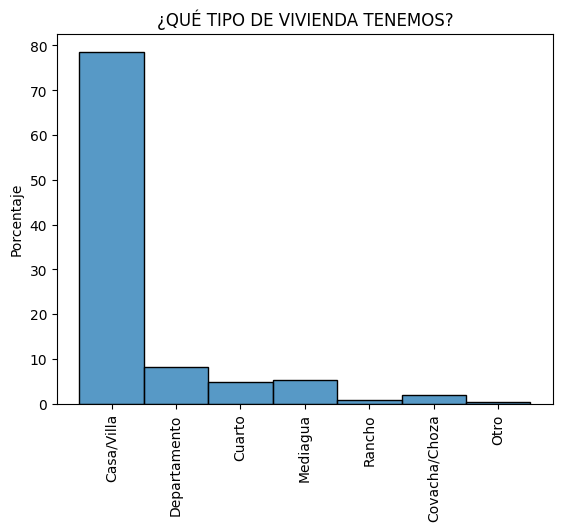

In [3]:
# Procesamos los datos para mejorar el gráfico
viv['tipov']="" # Añadimos una nueva columna y en las líneas de código siguientes le damos contenido según los códigos de la columna VTV
viv.loc[viv['VTV']==1,'tipov']="Casa/Villa"
viv.loc[viv['VTV']==2,'tipov']="Departamento"
viv.loc[viv['VTV']==3,'tipov']="Cuarto"
viv.loc[viv['VTV']==4,'tipov']="Mediagua"
viv.loc[viv['VTV']==5,'tipov']="Rancho"
viv.loc[(viv['VTV']==6) | (viv['VTV']==7),'tipov']="Covacha/Choza"
viv.loc[(viv['VTV']==8),'tipov']="Otro"

vivpar=viv.loc[viv['VTV']<=8].copy() # hacemos un filtro seleccionando solo viviendas particulares
vivpar=vivpar.sort_values("VTV") # Ordenamos la tabla por la variable VTV

# Creamos un gráfico
fig,ax=plt.subplots()  # Aquí se indica que queremos crear una figura (fig) que contiene un gráfico (ax)
sns.histplot(data=vivpar,x="tipov",stat="percent",ax=ax)  # Se indica que queremos representar un histograma, que muestre los porcentajes
ax.tick_params(axis='x', rotation=90) # Etiquetas del eje x giradas 90 grados para visualizarse mejor.
ax.set_ylabel("Porcentaje") # Título del eje y, donde se indica la unidad de medida
ax.set_xlabel("")  # No queremos título en el eje x, porque se sobre entiende.
ax.set_title("¿QUÉ TIPO DE VIVIENDA TENEMOS?")  # Título de la figura
plt.show() # Comando para que se dibuje el gráfico.

## 4. Estadística descriptiva

### 4.1. Distribución de frecuencias.  
  El gráfico anterior es un ejemplo de distribución de frecuencias, un histograma. Nos muestra como se dividen las observaciones (viviendas) por los valores o categorías de las variables.
  <br />  
Volvemos a crear un histograma, esta vez con la variable total de personas. Usamos la tabla ```vivpar``` y volvemos a hacer un filtro para quedarmos con aquellas viviendas particulares ocupadas con personas viviendo.

In [4]:
# Creamos tabla de viviendas particulares ocupadas (que la llamamos vpo)
vpo=vivpar.loc[vivpar['VCO']=="1"].copy()

<Axes: xlabel='TOTPER', ylabel='Count'>

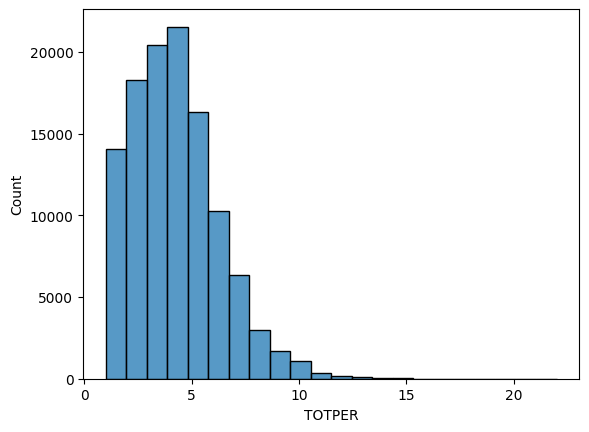

In [ ]:
sns.histplot(data=vpo,x="TOTPER", bins=22)


### 4.2. Medidas de tendencia central.  
- La *moda* es el valor o categoría que más se repite.   
- La *mediana* es el valor central de la distribución, que la divide en dos partes iguales.  
- La *media* es el promedio.
  <br />  
  Vamos a analizar las medidas de tendencia central de la variable total de personas que residen en viviendas particulares.

In [ ]:
vpo['TOTPER'].mode() # Moda

0    4
Name: TOTPER, dtype: int64

In [ ]:
vpo['TOTPER'].median() # Mediana

4.0

In [ ]:
vpo['TOTPER'].mean() # Media

3.907367995215816

### 4.3. Medidas de dispersión o variabilidad:
- Rango: valor máximo - valor mínimo.
- Varianza: promedio de las desviaciones cuadráticas respecto a la media.
- Desviación estándar: raíz cuadrada de la varianza. La desviación estándar es una medida interesante porque en una [distribución normal](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Standard_deviation_diagram_micro.svg/1920px-Standard_deviation_diagram_micro.svg.png), el 64,2% de la distribución se encuentra en torno a 1 desviación estandar de la media.

In [ ]:
print("El rango del número de personas ocupando una vivienda es: ",
      vpo['TOTPER'].max()-vpo['TOTPER'].min())

El rango del número de personas ocupando una vivienda es:  21


In [ ]:
print("La varianza del número de personas ocupando una vivienda es: ",
      vpo['TOTPER'].var())

La varianza del número de personas ocupando una vivienda es:  4.510358263727019


In [ ]:
print("La desviación estándar del número de personas ocupando una vivienda es: ",
      vpo['TOTPER'].std())

La desviación estándar del número de personas ocupando una vivienda es:  2.1237604063846325


### 4.4. Otras medidas de estadística descriptiva:
- Asimetría: en qué medida la distribución objeto de estudio se parece a una normal.
-Curtosis: elevación o achatamiento de la distribución, comparada con una normal.
-z-score: valor normalizado por la media y desviación estándar ```(x-u)/sigma```. Indica cuántas veces está un valor alejado de la media.


In [ ]:
# Asimetría
vpo['TOTPER'].skew() # Valor > 0: la cola de la distribución de la derecha es mayor que la de la izquierda (valor <0 sería lo contrario).

0.874998344220847

In [ ]:
# Curtosis:
vpo['TOTPER'].kurt() # Si x > 0: curtosis alta; si ~0 normal, si <0: baja. En este caso, tenemos un nivel bajo.

1.3308714180121486

<Axes: xlabel='TOTPER', ylabel='Count'>

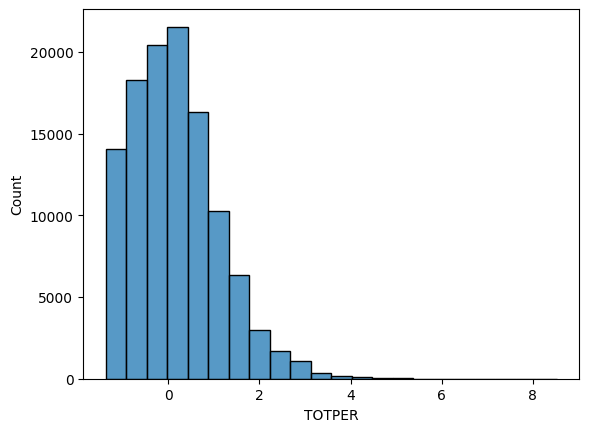

In [ ]:
# Z-score:
zscore=(vpo['TOTPER']-vpo['TOTPER'].mean())/vpo['TOTPER'].std()
sns.histplot(zscore, bins=22)


### 4.5. Resumen de estadísticos descriptivos

In [ ]:
# Resumen de la variable TOTPER
vpo['TOTPER'].describe()

count    113708.000000
mean          3.907368
std           2.123760
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max          22.000000
Name: TOTPER, dtype: float64

In [ ]:
# Resumen de la tabla vpo completa
vpo.describe()

# Cuidado: esto solo tiene sentido para las variables numéricas cardinales/ordinales, pero no para las que establecen categorías (!).
# Además, aquí podemos comprobar que algunas variables que deben ser numéricas están almacenadas como texto, por ej. el número de focos.

,I01,I02,I03,I04,I05,I09,I10,URV,VTV,TOTPER
count,113708.0,113708.000000,113708.000000,113708.000000,113708.000000,113708.000000,113708.0,113708.000000,113708.000000,113708.000000
mean,11.0,4.477688,51.434086,385.766481,5.735841,61.103317,1.0,1.448368,1.356131,3.907368
std,0.0,4.410396,2.714843,476.608025,5.155489,43.212976,0.0,0.497329,0.865544,2.123760
min,11.0,1.000000,50.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
25%,11.0,1.000000,50.000000,4.000000,2.000000,27.000000,1.0,1.000000,1.000000,2.000000
50%,11.0,2.000000,50.000000,31.000000,5.000000,54.000000,1.0,1.000000,1.000000,4.000000
75%,11.0,8.000000,52.000000,999.000000,7.000000,88.000000,1.0,2.000000,1.000000,5.000000
max,11.0,16.000000,63.000000,999.000000,39.000000,378.000000,1.0,2.000000,8.000000,22.000000


## 5. Agregaciones espaciales

Hemos estado usando datos individuales (a nivel de vivienda) hasta ahora, pero con frecuencia nos interesa conocer los datos agregados de diferentes unidades espaciales o territoriales, como la parroquia, el cantón y la provincia. Vamos a agrupar las filas de la tabla por cantones usando la función ```groupby()```.  
Para ello, tenemos que preparar las variables que nos interesa agrupar. Supongamos que queremos medir la calidad de los materiales de las viviendas, su estado de conservación, su nivel de ocupación (personas) y el número de dormitorios. Por tanto, nos interesan las siguientes variables:  V01, V03, V05, V02, V04, V06, TOTPER. Vamos a ir variable a variable.

In [ ]:
# Material techo (1 si teja u hormigon, 0 lo demás)
vpo['techo_mat']=0
vpo.loc[(vpo['V01']=="1") | (vpo['V01']=="4"), 'techo_mat']=1

# Material paredes (1 si hormigón o ladrillo/bloque, 0 lo demás)
vpo['pared_mat']=0
vpo.loc[(vpo['V03']=="1") | (vpo['V03']=="2"), 'pared_mat']=1

# Material suelo (1 si cerámica o duela/parquet..., 0 lo demás)
vpo['suelo_mat']=0
vpo.loc[(vpo['V05']=="1") | (vpo['V05']=="3"), 'suelo_mat']=1


In [ ]:
# Podemos echar un vistazo a los estadísticos descriptivos de estas tres variables
vpo[['techo_mat','pared_mat','suelo_mat']].describe()

,techo_mat,pared_mat,suelo_mat
count,113708.000000,113708.000000,113708.000000
mean,0.722113,0.585491,0.343758
std,0.447959,0.492639,0.474963
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [ ]:
# Estado de conservación (1 si bueno, 0 el resto)
vpo['techo_est']=0
vpo.loc[(vpo['V02']=="1") , 'techo_est']=1

vpo['pared_est']=0
vpo.loc[(vpo['V04']=="1") , 'pared_est']=1

vpo['suelo_est']=0
vpo.loc[(vpo['V06']=="1") , 'suelo_est']=1

vpo[['techo_est','pared_est','suelo_est']].describe()

,techo_est,pared_est,suelo_est
count,113708.000000,113708.000000,113708.000000
mean,0.391415,0.432072,0.392417
std,0.488069,0.495366,0.488291
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


Ahora ya podemos pasar a agrupar por cantones (variable I02) usando la función ```groupby()```. Antes de ello, vamos a crear una variable que toma siempre el valor 1 para contabilizar el total de viviendas en cada cantón.

In [ ]:
vpo["num"]=1

vpo_c=vpo[['I02','num','TOTPER', 'techo_mat', 'pared_mat',
       'suelo_mat', 'techo_est', 'pared_est', 'suelo_est']].groupby("I02").sum()

In [ ]:
# Esta es la tabla agregada a nivel cantonal
vpo_c

,num,TOTPER,techo_mat,pared_mat,suelo_mat,techo_est,pared_est,suelo_est
I02,,,,,,,,
1,54729,212208,40536,40987,30944,27956,30653,29183
2,6768,27736,5769,3764,1857,2339,2516,2184
3,7589,30419,5811,4868,1458,2460,2774,2518
4,3483,14042,2088,1784,605,1116,1165,985
5,1983,7020,1535,963,125,469,554,437
6,3443,14773,2703,1192,239,878,904,742
7,3606,12692,3030,1152,330,798,919,732
8,4696,18589,2228,2366,757,1420,1598,1352
9,6196,23733,4956,1917,625,1692,1917,1586


Obsérvese que la función ```sum()``` tiene sentido para agregar estas variables. Por el contrario, no hubiera tenido sentido agregar de esta manera las variables originales (V01, V03 ...).  
Por otra parte, sería interesante conocer el nombre de cada cantón, no solo su código numérico. Para ello, vamos a enlazar esta tabla con otra que contiene el código y nombre de cada cantón. Está disponible [aquí](https://github.com/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/material/cantones_loja.xlsx). Tenemos que descargarlo y subirlo a Google Colab.

In [ ]:
cantones=pd.read_excel("cantones_loja.xlsx")
cantones

,I02,Cantón
0,1,Loja
1,2,Calvas
2,3,Catamayo
3,4,Celica
4,5,Chaguarpamba
5,6,Espindola
6,7,Gonzanama
7,8,Macara
8,9,Paltas
9,10,Puyango


In [ ]:
vpo_c=vpo_c.reset_index() # para que I02 vuelva a ser una columna en la tabla en lugar del index

In [ ]:
vpo_c=vpo_c.merge(cantones,on="I02")
vpo_c

,I02,num,TOTPER,techo_mat,pared_mat,suelo_mat,techo_est,pared_est,suelo_est,Cantón
0,1,54729,212208,40536,40987,30944,27956,30653,29183,Loja
1,2,6768,27736,5769,3764,1857,2339,2516,2184,Calvas
2,3,7589,30419,5811,4868,1458,2460,2774,2518,Catamayo
3,4,3483,14042,2088,1784,605,1116,1165,985,Celica
4,5,1983,7020,1535,963,125,469,554,437,Chaguarpamba
5,6,3443,14773,2703,1192,239,878,904,742,Espindola
6,7,3606,12692,3030,1152,330,798,919,732,Gonzanama
7,8,4696,18589,2228,2366,757,1420,1598,1352,Macara
8,9,6196,23733,4956,1917,625,1692,1917,1586,Paltas
9,10,4014,15427,1616,2175,536,1274,1480,1263,Puyango


## 6. Cálculo de tasas

Podemos calcular a modo de ejemplo, las siguientes tasas:
* Porcentaje de viviendas en cada cantón con el techo de teja.
* Porcentaje de viviendas con los techos en buen estado de conservación.
* Porcentaje de viviendas en cada cantón con las paredes de hormigón o ladrillo.
* Porcentaje de viviendas con las paredes en buen estado de conservación.

Además, podemos calcular la ocupación media de las viviendas en cada cantón.

In [ ]:
vpo_c['techo_mat_p']=vpo_c['techo_mat']/vpo_c['num']
vpo_c['techo_est_p']=vpo_c['techo_est']/vpo_c['num']

vpo_c['pared_mat_p']=vpo_c['pared_mat']/vpo_c['num']
vpo_c['pared_est_p']=vpo_c['pared_est']/vpo_c['num']

vpo_c['totper_med']=vpo_c['TOTPER']/vpo_c['num']

Ahora podemos representar gráficamente las variables. Por ejemplo, la tasa de viviendas con techos de teja/hormigón:

In [ ]:
sns.barplot(data=vpo_c, y="Cantón",x="techo_mat_p", color="tab:red")


Es fácil mejorar la apariencia e inteligibilidad del gráfico anterior:

In [ ]:
fig,ax=plt.subplots()
sns.barplot(data=vpo_c, y="Cantón",x="techo_mat_p", color="tab:red")
ax.set_xlabel("Porcentaje de viviendas")
ax.set_ylabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Viviendas con techos de teja u hormigón \n")
plt.show()

En cualquier caso, si os resulta al principio más fácil, podéis exportar los datos procesados y realizar el gráfico en otro programa con el que estéis más familiarizados. Para ello, usaís la función ```to_excel()``` como se muestra a continuación:

In [ ]:
vpo_c.to_excel("datos_cantones.xlsx")

El archivo os lo guarda junto a los otros archivos que habéis subido. Solamente hay que descargarlo.

*Nótese que si queremos calcular el porcentaje de viviendas con techo de tejas y paredes de labrillo, tenemos que volver a la tabla a nivel de viviendas y crear una variable que combine ambas condiciones. Por ejemplo:

```
vpo['techo_pared']=0
vpo.loc[(vpo['techo_mat']==1) & (vpo['pared_mat']==1),'techo_pared']=1
```

Y posteriormente habría que volver a aplicar la función ```groupby()```.




## 5. Análisis bivariante

### 5.1. Correlaciones

A modo de ejemplo, vamos a ver la correlación entre el porcentaje de

<Axes: xlabel='techo_est_p', ylabel='pared_est_p'>

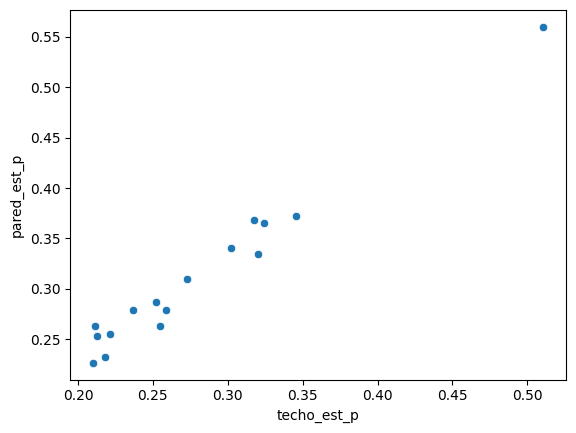

In [ ]:
sns.scatterplot(data=vpo_c,x="techo_est_p",y="pared_est_p")

In [ ]:
vpo.TOTPER.describe()

count    113708.000000
mean          3.907368
std           2.123760
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max          22.000000
Name: TOTPER, dtype: float64

<Axes: xlabel='pared_mat_p', ylabel='totper_med'>

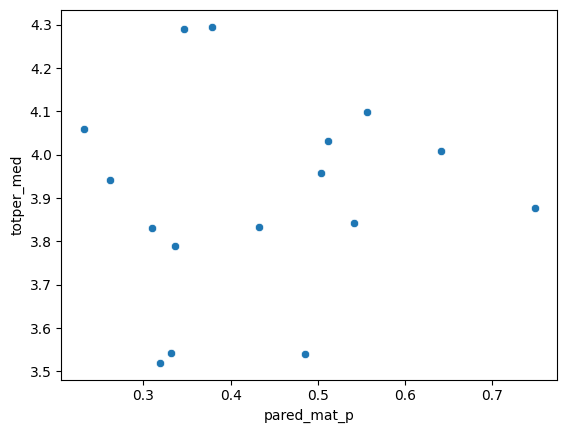

In [ ]:
sns.scatterplot(data=vpo_c,x="pared_mat_p",y="totper_med")